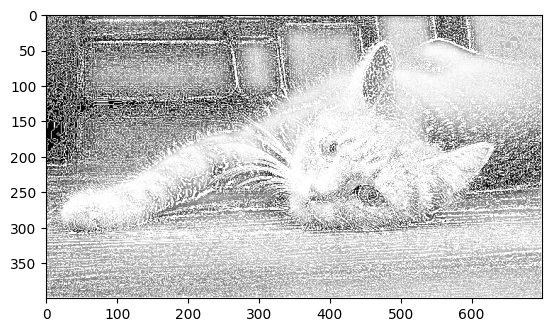

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import cm


def unsharping_and_highboosting(img):


  image_after = np.copy(img)
  image_array = np.array(img)

# Define the kernel for unsharp masking
  kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

# Apply the unsharp masking filter
  unsharpened_image = np.zeros_like(image_array)
  for i in range(1, image_array.shape[0]-1):
    for j in range(1, image_array.shape[1]-1):
      unsharpened_image[i, j] = np.clip(np.sum(image_array[i-1:i+2, j-1:j+2] * kernel), 0, 255)
  boosted_image = image_array + (unsharpened_image - image_array) * 1.5
  boosted_image = np.clip(boosted_image, 0, 255).astype(np.uint8)
  return boosted_image
# Calculate the high-boost filtering
img = cv2.imread('/content/PEPE_WhatsNew_2_700x400.jpg', cv2.IMREAD_GRAYSCALE)
unsharping_and_highboosting(img)
plt.imshow(img,cmap='gray')